   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
✅ Accuracy: 0.7988826815642458
🧮 Confusion Matrix:
 [[96  9]
 [27 47]]
📋 Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.91      0.84       105
           1       0.84      0.64      0.72        74

    accuracy                           0.80       179
   macro avg       

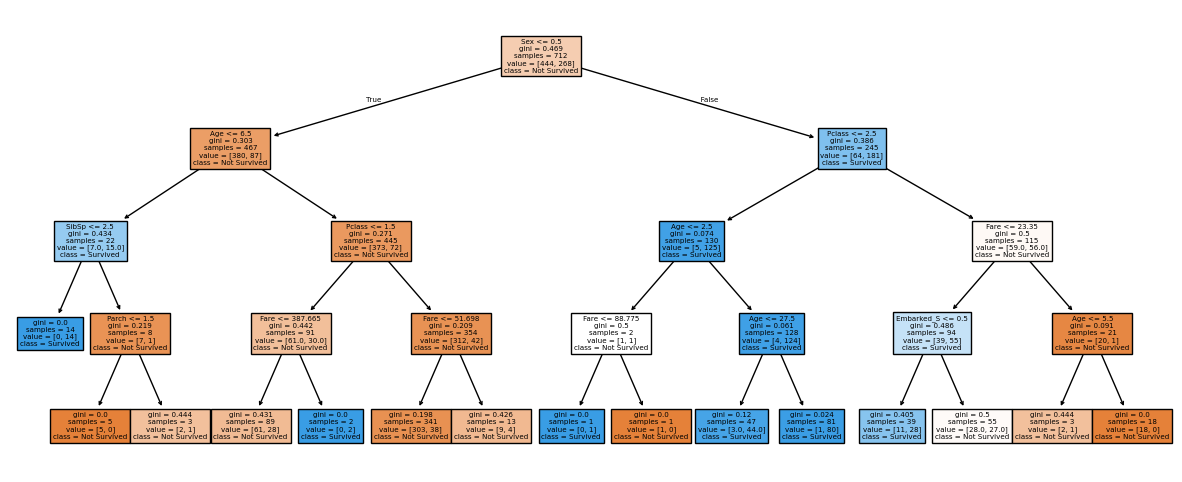

Depth: 1 - Accuracy: 0.782
Depth: 2 - Accuracy: 0.765
Depth: 3 - Accuracy: 0.799
Depth: 4 - Accuracy: 0.799
Depth: 5 - Accuracy: 0.799
Depth: 6 - Accuracy: 0.799
Depth: 7 - Accuracy: 0.804
Depth: 8 - Accuracy: 0.793
Depth: 9 - Accuracy: 0.793


In [4]:
# Step-by-Step: Titanic + Decision Tree Classifier
# 1. Load & Clean Titanic Dataset-----------------------------------------------------------------------------------

import pandas as pd
from sklearn.model_selection import train_test_split

# Load Titanic dataset
df = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')
print(df.head(3))

# Basic cleaning
df = df[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]

# Handle missing values

df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])


# Convert categorical to numeric
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

# Split features/target
X = df.drop('Survived', axis=1)
y = df['Survived']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



from sklearn.tree import DecisionTreeClassifier

# Try different settings for criterion and max_depth
dt_model = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=42)

# Train the model
dt_model.fit(X_train, y_train)

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Predictions
y_pred = dt_model.predict(X_test)

# Accuracy
acc = accuracy_score(y_test, y_pred)
print("✅ Accuracy:", acc)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("🧮 Confusion Matrix:\n", cm)

# Classification Report
cr = classification_report(y_test, y_pred)
print("📋 Classification Report:\n", cr)


from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 6))
plot_tree(dt_model, feature_names=X.columns, class_names=["Not Survived", "Survived"], filled=True)
plt.show()

for depth in range(1, 10):
    model = DecisionTreeClassifier(max_depth=depth, random_state=42)
    model.fit(X_train, y_train)
    print(f"Depth: {depth} - Accuracy: {accuracy_score(y_test, model.predict(X_test)):.3f}")






Compare Logistic Regression vs Decision Tree Classifier on the Titanic dataset using:

Accuracy
Precision / Recall / F1
Confusion Matrix
Final thoughts on which to trust more and why





🔍 Logistic Regression Results
Accuracy: 0.8100558659217877
Confusion Matrix:
[[90 15]
 [19 55]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179


🔍 Decision Tree Results
Accuracy: 0.7988826815642458
Confusion Matrix:
[[96  9]
 [27 47]]
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.91      0.84       105
           1       0.84      0.64      0.72        74

    accuracy                           0.80       179
   macro avg       0.81      0.77      0.78       179
weighted avg       0.80      0.80      0.79       179



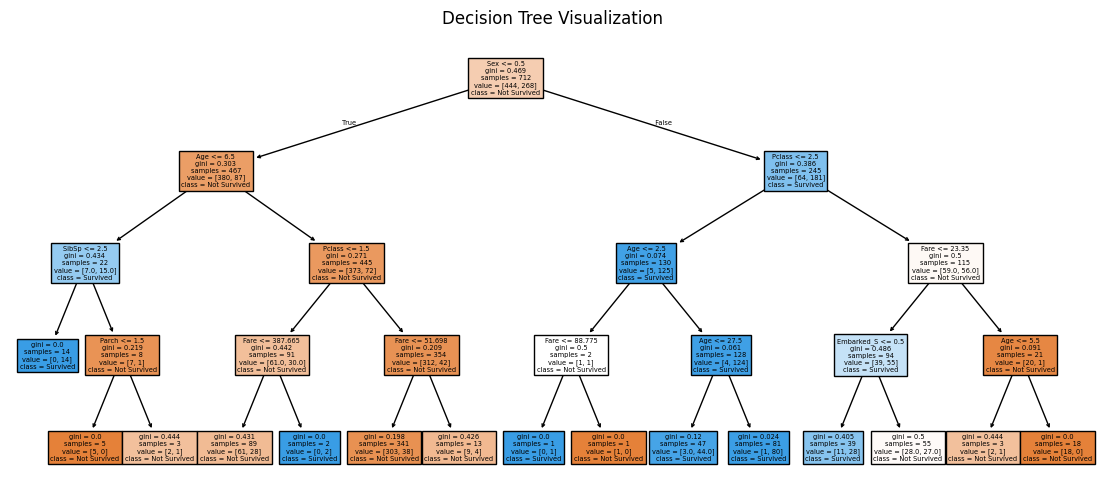

In [9]:
# 📦 Imports
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# 🧼 Load & Clean Titanic Dataset
df = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')
df = df[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
df["Age"] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

# 🎯 Features and Target
X = df.drop('Survived', axis=1)
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ---------------------------
# 🤖 Model 1: Logistic Regression
# ---------------------------
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
y_pred_log = logreg.predict(X_test)

# ---------------------------
# 🌳 Model 2: Decision Tree
# ---------------------------
dtree = DecisionTreeClassifier(max_depth=4, criterion='gini', random_state=42)
dtree.fit(X_train, y_train)
y_pred_tree = dtree.predict(X_test)

# ---------------------------
# 📊 Evaluation & Comparison
# ---------------------------
def evaluate_model(name, y_true, y_pred):
    print(f"\n🔍 {name} Results")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_true, y_pred))
    print("Classification Report:")
    print(classification_report(y_true, y_pred))

evaluate_model("Logistic Regression", y_test, y_pred_log)
evaluate_model("Decision Tree", y_test, y_pred_tree)

# ---------------------------
# 🌿 Optional: Visualize Decision Tree
# ---------------------------
plt.figure(figsize=(14, 6))
plot_tree(dtree, feature_names=X.columns, class_names=["Not Survived", "Survived"], filled=True)
plt.title("Decision Tree Visualization")
plt.show()



